In [11]:
import numpy as np
from sklearn import metrics

threshold = 0.05

# 读取数据
import csv

with open('score.csv', newline='') as f:
    reader = csv.reader(f)
    s = list(reader)
tmp = s[0]
score = np.array([float(item) for item in tmp])

with open('label.csv', newline='') as f:
    reader = csv.reader(f)
    l = list(reader)
tmp = l[0]
label = np.array([float(item) for item in tmp])

y_pred=score>threshold

In [33]:
#计算混淆矩阵、TPR、FPR，Precision,Recall,F1-score,accuracy。
# 1为P，0为N
N=len(label)
TP=(label[y_pred==True]==1).sum() # TP(True Positive): 真实为1，预测也为1
TN=(label[y_pred==False]==0).sum() # TN(True Negative): 真实为0，预测也为0 
FP=(label[y_pred==True]==0).sum() # FP(False Positive): 真实为0，预测为1
FN=(label[y_pred==False]==1).sum() # FN(False Negative): 真实为1，预测为0
# 混淆矩阵
print("混淆矩阵:")
print("[", [TP, FP])
print(" ", [FN, TN], "]")

TPR=TP/(TP+FN)
print("TPR:", TPR)
FPR=FP/(FP+TN)
print("FPR:", FPR)
precision=TP/(TP+FP)
print("precision:", precision*100, "%")
recall=TP/(TP+FN)
print("recall:", recall*100, "%")
F1=2*TP/(2*TP+FP+FN)
print("F1-score:", F1)
accuracy=(TP+TN)/N
print("accuracy:", accuracy*100, "%")


混淆矩阵:
[ [766, 38]
  [34, 122] ]
TPR: 0.9575
FPR: 0.2375
precision: 95.27363184079603 %
recall: 95.75 %
F1-score: 0.9551122194513716
accuracy: 92.5 %


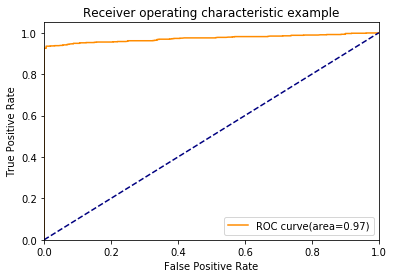

In [32]:
# 绘制ROC曲线，计算AUC
fpr, tpr, thresholds = metrics.roc_curve(label, score, pos_label=1)
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
roc_auc=auc(fpr, tpr)
plt.plot(fpr, tpr, color="darkorange", label="ROC curve(area=%0.2f)"%roc_auc)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()